# Exporatory Text Analysis

In [111]:
%matplotlib inline
%matplotlib widget

import pandas as pd
import numpy as np
import emojis
import emoji
import regex
import re
import collections
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


## Get Data

In [38]:
messages = pd.read_csv('messages_no_scrubs.csv')
messages.head()

,Chat Session,message_date,Deliver_date,read_date,service,type,sender_id,sender_name,status,subject,text,attachment,attachmen_type
0,No Scrubs,12/27/19 14:21,NaN,NaN,iMessage,Outgoing,NaN,NaN,Sent,NaN,NaN,IMG_2805.HEIC,Image
1,No Scrubs,12/27/19 14:21,NaN,NaN,iMessage,Outgoing,NaN,NaN,Sent,NaN,My dad is currently telling Milo about all the...,NaN,NaN
2,No Scrubs,12/27/19 14:22,NaN,12/27/19 14:22,iMessage,Incoming,1.917829e+10,Melissa Ross,Read,NaN,🤣🤣 also he got so big!!!,NaN,NaN
3,No Scrubs,12/27/19 14:22,NaN,NaN,iMessage,Outgoing,NaN,NaN,Sent,NaN,Liked “🤣🤣 also he got so big!!! ”,NaN,NaN
4,No Scrubs,12/27/19 14:23,NaN,12/27/19 14:23,iMessage,Incoming,1.610662e+10,Claire Soloman,Read,NaN,HAMBURGER,NaN,NaN


## Clean Data

In [75]:
# my messages don't have sender names
messages.sender_name = messages.sender_name.fillna('Sara Riker')

#Images show as null in text
messages['message'] = np.where(messages["text"].isnull(), messages["attachmen_type"], messages["text"] )

#tapbacks
tapbacks = ['Liked', 'Loved', 'Laughed', 'Emphasized', 'Disliked']
messages['tapback'] = np.where(messages['message'].str.split().str[0].isin(tapbacks), messages['message'].str.split().str[0], "")
messages['message'] = np.where(messages['message'].str.split().str[0].isin(tapbacks), messages['message'].str.split().str[0], messages['message'])
messages['date'] = messages['message_date'].str.split().str[0]
messages['time'] = messages['message_date'].str.split().str[1]

# Emojis
#messages['emoji'] = messages_final['message'].apply(lambda x: emojis.get(x))

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

messages["emoji"] = messages_final["message"].apply(split_count)

#only columns I care about 
messages_final = messages[['date', 'time', 'sender_name', 'message', 'tapback', 'emoji']]


In [76]:
messages_final.head()

,date,time,sender_name,message,tapback,emoji
0,12/27/19,14:21,Sara Riker,Image,,[]
1,12/27/19,14:21,Sara Riker,My dad is currently telling Milo about all the...,,[😂]
2,12/27/19,14:22,Melissa Ross,🤣🤣 also he got so big!!!,,"[🤣, 🤣]"
3,12/27/19,14:22,Sara Riker,Liked,Liked,[]
4,12/27/19,14:23,Claire Soloman,HAMBURGER,,[]


In [74]:


total_messages = messages_final.shape[0]
media_messages = messages_final[messages_final['message'] == '<Media omitted>'].shape[0]
messages_final["emoji_2"] = messages_final["message"].apply(split_count)
emojis = sum(messages_final['emoji_2'].str.len())
URLPATTERN = r'(https?://\S+)'
#df['urlcount'] = messages_final.message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
#links = np.sum(messages_final.urlcount)

# Emojis

In [90]:
total_emojis_list = list([a for b in messages_final.emoji for a in b])
emoji_dict = dict(collections.Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,282
1,❤️,247
2,🤣,184
3,🤷‍♀️,97
4,🤦🏼‍♀️,84
...,...,...
112,💙,1
113,🦃,1
114,🤗,1
115,🎁,1


In [112]:
fig = px.pie(emoji_df, values='count', names='emoji',
             title='Emoji Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

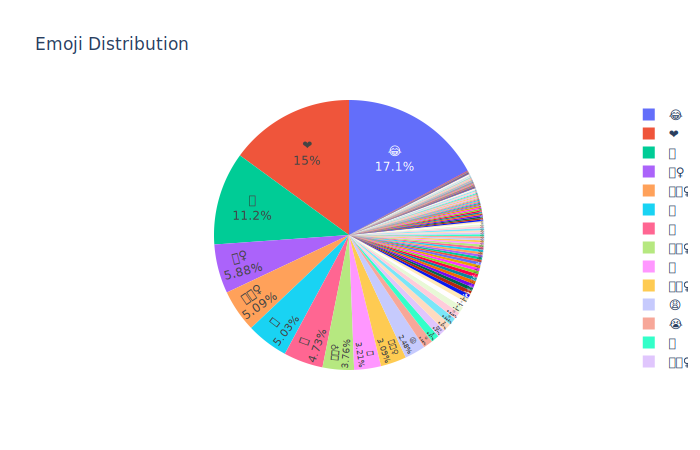

In [118]:
fig.show(renderer="svg")